In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout


In [13]:
IMAGESIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [14]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/Users/sanjeevkumarsrivastava/Desktop/Hack/DatasetMake",image_size=(IMAGESIZE,IMAGESIZE),batch_size=BATCH_SIZE)

Found 4217 files belonging to 4 classes.


In [15]:
class_names = dataset.class_names
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

2023-03-29 06:40:54.252112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]
2023-03-29 06:40:54.253404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4217]
	 [[{{node Placeholder/_0}}]]


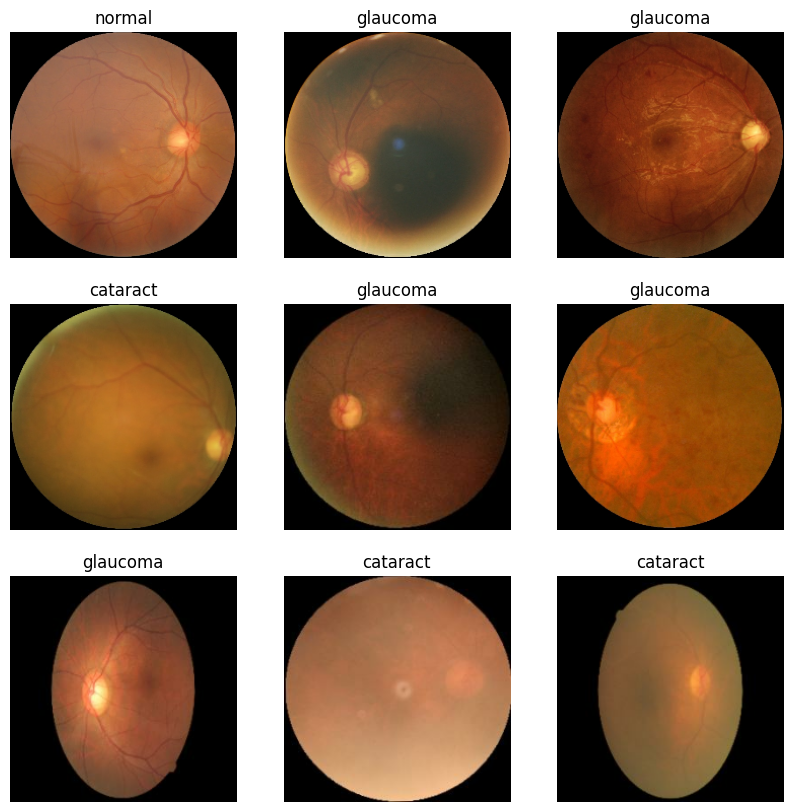

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
train_size = int(0.8 * len(dataset))
test_size = int(0.2 * len(dataset))
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

2023-03-29 06:40:58.331160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4217]
	 [[{{node Placeholder/_0}}]]
2023-03-29 06:40:58.333797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]


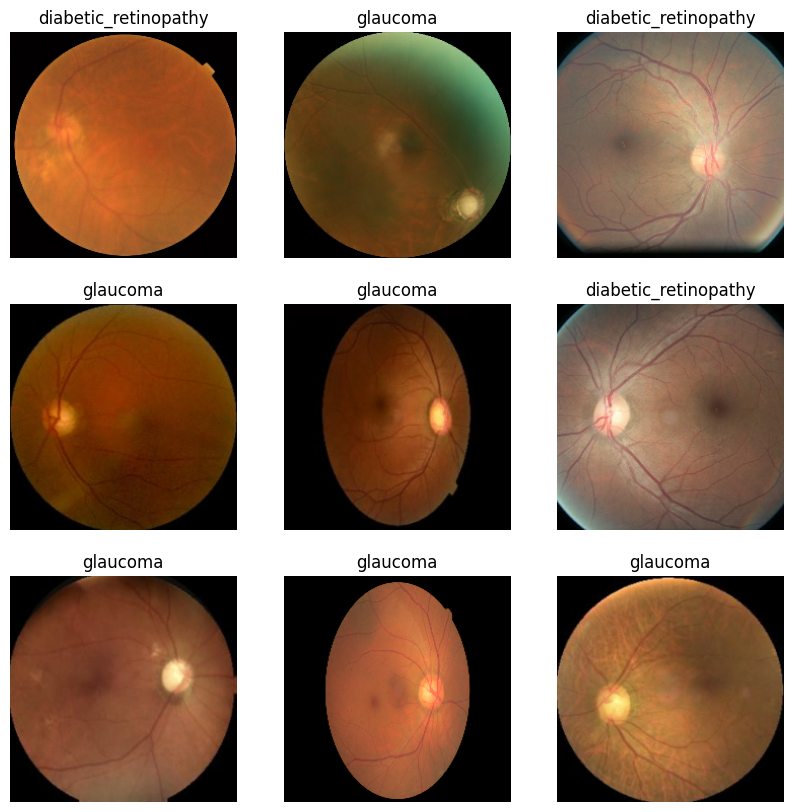

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

2023-03-29 06:41:03.295216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]
2023-03-29 06:41:03.296931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]


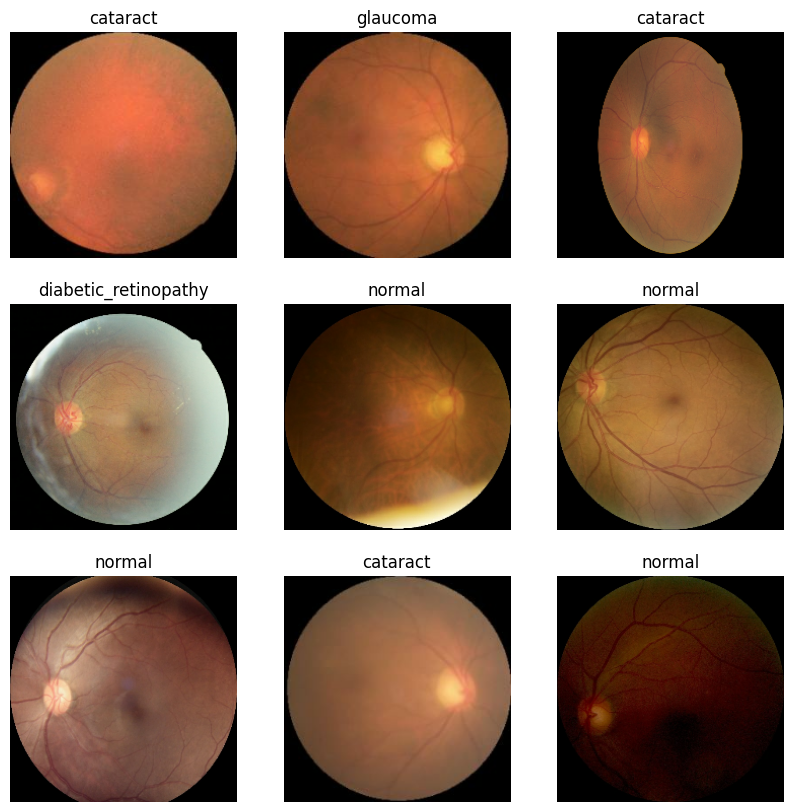

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(IMAGESIZE,IMAGESIZE,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 128)     

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

Epoch 1/50


2023-03-29 06:41:32.923971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4217]
	 [[{{node Placeholder/_0}}]]
2023-03-29 06:41:32.924832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]


105/105 [==============================] - ETA: 0s - loss: -38388795179008.0000 - accuracy: 0.2604

2023-03-29 06:47:52.488442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]
2023-03-29 06:47:52.489885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4217]
	 [[{{node Placeholder/_4}}]]


105/105 [==============================] - 422s 4s/step - loss: -38388795179008.0000 - accuracy: 0.2604 - val_loss: -346301334028288.0000 - val_accuracy: 0.2579
Epoch 2/50
105/105 [==============================] - 440s 4s/step - loss: -83066351131820032.0000 - accuracy: 0.2577 - val_loss: -409813272439554048.0000 - val_accuracy: 0.2509
Epoch 3/50
105/105 [==============================] - 435s 4s/step - loss: -5268257187930570752.0000 - accuracy: 0.2586 - val_loss: -16315181354079748096.0000 - val_accuracy: 0.2614
Epoch 4/50
105/105 [==============================] - 343s 3s/step - loss: -79488770917600854016.0000 - accuracy: 0.2607 - val_loss: -195892580410525220864.0000 - val_accuracy: 0.2544
Epoch 5/50
105/105 [==============================] - 362s 3s/step - loss: nan - accuracy: 0.2491 - val_loss: nan - val_accuracy: 0.2532
Epoch 6/50
105/105 [==============================] - 344s 3s/step - loss: nan - accuracy: 0.2429 - val_loss: nan - val_accuracy: 0.2555
Epoch 7/50
105/105 [=

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
model.save("model.h5")

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        plt.text(0, 0, predictions[i], color='red', fontsize=20)

In [ ]:
redictions = model.predict(test_dataset)